<a href="https://colab.research.google.com/github/siddharth-kale/DNA3/blob/main/DNA3_a380_Flight_Status.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt
from google.colab import drive
import glob

In [2]:
pd.options.display.max_rows=999

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
files = glob.glob("/content/gdrive/MyDrive/Projects/DNA3/Data/a380/*.csv")

In [5]:
a380_df = pd.DataFrame()

for f in files:
  print(f)
  temp_df = pd.read_csv(f).drop(columns=['Unnamed: 0'])
  a380_df = a380_df.append(temp_df)

a380_df 

/content/gdrive/MyDrive/Projects/DNA3/Data/a380/2019-12-23.csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/content/gdrive/MyDrive/Projects/DNA3/Data/a380/2020-01-09.csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


/content/gdrive/MyDrive/Projects/DNA3/Data/a380/2020-02-03.csv
/content/gdrive/MyDrive/Projects/DNA3/Data/a380/2020-03-06.csv
/content/gdrive/MyDrive/Projects/DNA3/Data/a380/2020-04-05.csv
/content/gdrive/MyDrive/Projects/DNA3/Data/a380/2020-05-10.csv
/content/gdrive/MyDrive/Projects/DNA3/Data/a380/2020-06-23.csv
/content/gdrive/MyDrive/Projects/DNA3/Data/a380/2020-07-06.csv
/content/gdrive/MyDrive/Projects/DNA3/Data/a380/2020-08-04.csv
/content/gdrive/MyDrive/Projects/DNA3/Data/a380/2020-09-11.csv
/content/gdrive/MyDrive/Projects/DNA3/Data/a380/2020-10-20.csv
/content/gdrive/MyDrive/Projects/DNA3/Data/a380/2020-11-07.csv
/content/gdrive/MyDrive/Projects/DNA3/Data/a380/2020-12-12.csv
/content/gdrive/MyDrive/Projects/DNA3/Data/a380/2021-01-18.csv
/content/gdrive/MyDrive/Projects/DNA3/Data/a380/2021-02-01.csv
/content/gdrive/MyDrive/Projects/DNA3/Data/a380/2021-03-25.csv
/content/gdrive/MyDrive/Projects/DNA3/Data/a380/2021-04-16.csv
/content/gdrive/MyDrive/Projects/DNA3/Data/a380/2021-05

,alert,altitude,callsign,geoaltitude,groundspeed,hour,icao24,last_position,latitude,longitude,onground,spi,squawk,timestamp,track,vertical_rate
0,False,NaN,ETD455,NaN,NaN,2019-11-30 01:00:00+00:00,89649e,NaN,NaN,NaN,False,False,NaN,2019-11-30 01:30:25+00:00,NaN,NaN
1,False,NaN,ETD455,NaN,NaN,2019-11-30 01:00:00+00:00,89649e,NaN,NaN,NaN,False,False,NaN,2019-11-30 01:30:26+00:00,NaN,NaN
2,False,32125.0,ETD455,NaN,NaN,2019-11-30 01:00:00+00:00,89649e,NaN,NaN,NaN,False,False,4741.0,2019-11-30 01:30:27+00:00,NaN,NaN
3,False,32100.0,ETD455,NaN,NaN,2019-11-30 01:00:00+00:00,89649e,NaN,NaN,NaN,False,False,4741.0,2019-11-30 01:30:28+00:00,NaN,NaN
4,False,32100.0,ETD455,NaN,NaN,2019-11-30 01:00:00+00:00,89649e,NaN,NaN,NaN,False,False,4741.0,2019-11-30 01:30:29+00:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794458,False,39000.0,UAE93P,39875.0,510.0,2021-11-02 23:00:00+00:00,8964b2,2021-11-02 23:59:30.377000192+00:00,40.581308,35.475478,False,True,7557.0,2021-11-02 23:59:55+00:00,106.623968,0.0
794459,False,39000.0,UAE93P,39875.0,510.0,2021-11-02 23:00:00+00:00,8964b2,2021-11-02 23:59:30.377000192+00:00,40.581308,35.475478,False,True,7557.0,2021-11-02 23:59:56+00:00,106.623968,0.0
794460,False,39000.0,UAE93P,39875.0,510.0,2021-11-02 23:00:00+00:00,8964b2,2021-11-02 23:59:30.377000192+00:00,40.581308,35.475478,False,True,7557.0,2021-11-02 23:59:57+00:00,106.623968,0.0
794461,False,39000.0,UAE93P,39875.0,510.0,2021-11-02 23:00:00+00:00,8964b2,2021-11-02 23:59:30.377000192+00:00,40.581308,35.475478,False,True,7557.0,2021-11-02 23:59:58+00:00,106.623968,0.0


In [6]:
a380_df['date'] = a380_df['timestamp'].str[:10]

In [7]:
a380_df['icao24'] = a380_df['icao24'].astype(dtype='string')
a380_df['date'] = a380_df['date'].astype(dtype='string')

In [8]:
a380_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24412382 entries, 0 to 794462
Data columns (total 17 columns):
 #   Column         Dtype  
---  ------         -----  
 0   alert          bool   
 1   altitude       float64
 2   callsign       object 
 3   geoaltitude    float64
 4   groundspeed    float64
 5   hour           object 
 6   icao24         string 
 7   last_position  object 
 8   latitude       float64
 9   longitude      float64
 10  onground       bool   
 11  spi            bool   
 12  squawk         float64
 13  timestamp      object 
 14  track          float64
 15  vertical_rate  float64
 16  date           string 
dtypes: bool(3), float64(8), object(4), string(2)
memory usage: 2.8+ GB


In [9]:
fleet_df = a380_df.groupby(by=['date','icao24']).agg(
    {
        'groundspeed':['mean']
    }
).reset_index()

fleet_df.columns=['date','ICAO','groundspeed']

fleet_df

,date,ICAO,groundspeed
0,2019-11-30,06a142,406.760333
1,2019-11-30,06a143,322.918874
2,2019-11-30,06a145,532.070513
3,2019-11-30,06a146,443.539521
4,2019-11-30,06a147,423.480344
...,...,...,...
1221,2021-11-02,89647e,476.822661
1222,2021-11-02,896480,342.572914
1223,2021-11-02,896481,406.964503
1224,2021-11-02,8964b1,411.051831


In [10]:
final_df = fleet_df[fleet_df['groundspeed'].notna()].groupby(by=['date']).agg({
    
    'groundspeed':['mean'],
    'ICAO':['count']

}
).reset_index()
final_df.columns=['Date','Groundspeed','Aircraft']
final_df['Date'] = final_df['Date'].str[:7]

In [11]:
final_df

,Date,Groundspeed,Aircraft
0,2019-11,413.404207,194
1,2019-12,415.770491,196
2,2020-01,416.288459,194
3,2020-02,418.462424,184
4,2020-03,426.550453,161
5,2020-04,455.147586,4
6,2020-05,510.520971,1
7,2020-06,293.729034,2
8,2020-07,327.398507,5
9,2020-08,432.439972,8


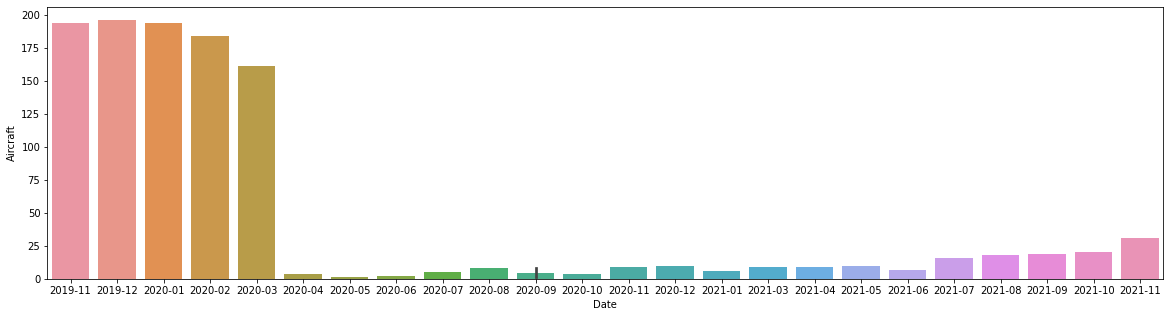

In [12]:
plt.figure(figsize=(20,5))
sea.barplot(x='Date',y='Aircraft',data=final_df)

In [ ]:
# final_df.to_csv('/content/gdrive/MyDrive/AlternativeData/DNA3/flights/Plots/a380.csv')